### Location Analysis for "Winter-Coma" launch in Canada

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN 

#### Importing Weather Station data from the environment Canada monthly dataset

### About the dataset

		
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

In [2]:
#Downloading the data

!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-06-04 10:22:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  --.-KB/s    in 0.08s   

2020-06-04 10:22:36 (1.49 MB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



In [3]:
import csv

filename='weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [4]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [5]:
#Cleaning Data

pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


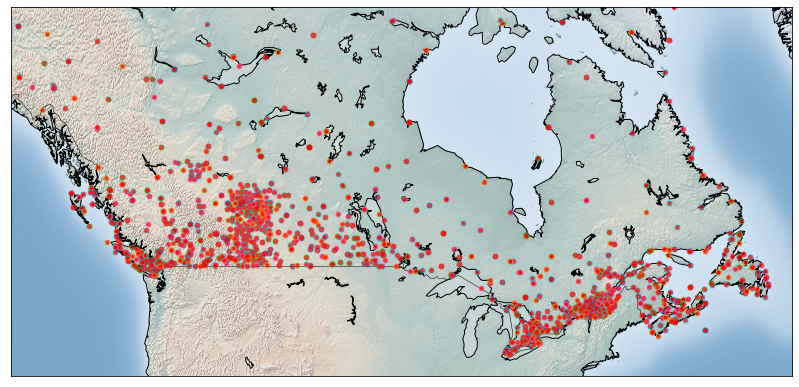

In [6]:
#Visualizing the weather stations on the map of Canada

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()

In [7]:
#Clustering stations based on location and weather

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [8]:
pdf.Clus_Db.value_counts()

-1    428
 5    266
 3    215
 0    151
 4     51
 1     20
 2     17
 7     15
 6     14
 8     12
Name: Clus_Db, dtype: int64

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


Cluster 0, Avg Temp: 6.221192052980132
Cluster 1, Avg Temp: 6.790000000000001
Cluster 2, Avg Temp: -0.49411764705882344
Cluster 3, Avg Temp: -13.87720930232558
Cluster 4, Avg Temp: -4.186274509803922
Cluster 5, Avg Temp: -16.301503759398496
Cluster 6, Avg Temp: -13.599999999999998
Cluster 7, Avg Temp: -9.753333333333334
Cluster 8, Avg Temp: -4.258333333333334


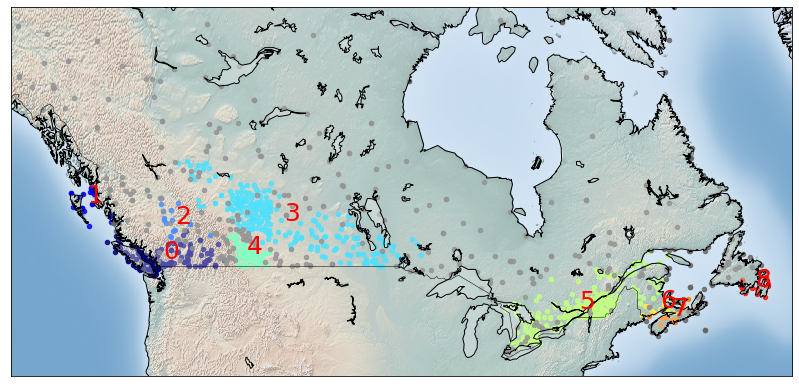

In [9]:
#Visualizing the clusters

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

#### From the analysis it shows that clusters 3,5 and 6 are the ones with least avg temperature, now we need to analyse the size of these clusters

In [10]:
#Considering cluster 5 since its the biggest cluster in that region with lowest avg. temperatures 
pdf_east=pdf[(pdf["Clus_Db"] == 5)]
pdf_east.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_Db
786,KILLARNEY (AUT),45.967,-81.483,ON,-15.4,0.0,NaN,-3.0,0.0,-29.1,...,NaN,NaN,NaN,NaN,934.4,0.0,605DJ25,6.506790e+06,9.081025e+05,5
788,MASSEY,46.193,-82.025,ON,-17.8,0.0,-8.2,-3.5,0.0,-38.5,...,12.0,NaN,NaN,NaN,1002.8,0.0,6065006,6.446523e+06,9.443311e+05,5
790,SUDBURY A,46.626,-80.798,ON,-19.3,0.0,NaN,-6.0,0.0,-32.2,...,9.0,NaN,NaN,NaN,1043.5,0.0,6068153,6.582959e+06,1.014161e+06,5
804,ALGONQUIN PARK EAST GATE,45.533,-78.267,ON,-18.7,0.0,NaN,-4.5,0.0,-35.8,...,11.0,NaN,NaN,NaN,1027.8,0.0,6080192,6.864393e+06,8.389429e+05,5
805,NORTH BAY A,46.364,-79.424,ON,-19.2,0.0,NaN,-6.3,0.0,-35.2,...,2.0,NaN,NaN,NaN,1041.0,0.0,6085680,6.735741e+06,9.718422e+05,5


In [11]:
pdf_east.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 786 to 1193
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  266 non-null    object 
 1   Lat       266 non-null    float64
 2   Long      266 non-null    float64
 3   Prov      266 non-null    object 
 4   Tm        266 non-null    float64
 5   DwTm      266 non-null    float64
 6   D         118 non-null    float64
 7   Tx        266 non-null    float64
 8   DwTx      266 non-null    float64
 9   Tn        266 non-null    float64
 10  DwTn      266 non-null    float64
 11  S         155 non-null    float64
 12  DwS       155 non-null    float64
 13  S%N       54 non-null     float64
 14  P         247 non-null    float64
 15  DwP       247 non-null    float64
 16  P%N       54 non-null     float64
 17  S_G       177 non-null    float64
 18  Pd        247 non-null    float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      flo

In [12]:
pdf_west=pdf[pdf["Clus_Db"] == 3]
pdf_west.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,Clus_Db
249,FORT ST. JOHN A,56.238,-120.740,BC,-9.6,0.0,NaN,9.7,0.0,-29.2,...,8.0,NaN,NaN,NaN,771.5,0.0,1183001,2.141613e+06,2.736932e+06,3
377,ABEE AGDM,54.283,-112.967,AB,-13.6,0.0,NaN,6.4,0.0,-29.8,...,7.0,NaN,NaN,NaN,884.0,0.0,3010010,3.005931e+06,2.355354e+06,3
378,ALBERT HALL AGCM,53.113,-111.181,AB,-13.3,0.0,NaN,4.9,0.0,-32.4,...,4.0,NaN,NaN,NaN,876.4,0.0,3010060,3.204525e+06,2.135592e+06,3
379,ALLIANCE AGCM,52.315,-111.779,AB,-11.2,0.0,NaN,6.1,0.0,-26.4,...,8.0,NaN,NaN,NaN,816.5,0.0,3010162,3.138031e+06,1.989112e+06,3
380,ANDREW AGDM,53.917,-112.279,AB,-13.2,1.0,NaN,4.9,0.0,-29.5,...,4.0,NaN,NaN,NaN,843.2,0.0,3010237,3.082433e+06,2.285949e+06,3


In [13]:
pdf_west.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 249 to 767
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  215 non-null    object 
 1   Lat       215 non-null    float64
 2   Long      215 non-null    float64
 3   Prov      215 non-null    object 
 4   Tm        215 non-null    float64
 5   DwTm      215 non-null    float64
 6   D         44 non-null     float64
 7   Tx        215 non-null    float64
 8   DwTx      215 non-null    float64
 9   Tn        215 non-null    float64
 10  DwTn      215 non-null    float64
 11  S         56 non-null     float64
 12  DwS       56 non-null     float64
 13  S%N       23 non-null     float64
 14  P         201 non-null    float64
 15  DwP       201 non-null    float64
 16  P%N       29 non-null     float64
 17  S_G       107 non-null    float64
 18  Pd        201 non-null    float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [14]:
pdf_east.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,xm,ym,Clus_Db
count,266.000000,266.000000,266.000000,266.000000,118.000000,266.000000,266.00000,266.000000,266.000000,155.000000,...,177.000000,247.000000,0.0,0.0,0.0,266.000000,266.0,2.660000e+02,2.660000e+02,266.0
mean,45.726654,-74.461019,-16.301504,4.007519,-7.555085,-3.032707,2.75188,-31.218045,2.951128,45.723226,...,42.050847,9.178138,NaN,NaN,NaN,820.704135,0.0,7.287599e+06,8.732364e+05,5.0
std,1.562825,4.329700,2.386518,6.170528,1.055761,1.723999,4.62382,3.743217,5.149231,22.222251,...,23.121289,3.722139,NaN,NaN,NaN,214.350467,0.0,4.814404e+05,2.501399e+05,0.0
min,42.450000,-82.950000,-23.800000,0.000000,-11.100000,-6.600000,0.00000,-41.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,31.500000,0.0,6.343668e+06,3.622791e+05,5.0
25%,44.981250,-78.795000,-17.500000,0.000000,-8.100000,-4.100000,0.00000,-34.000000,0.000000,28.900000,...,28.000000,7.000000,NaN,NaN,NaN,720.075000,0.0,6.805682e+06,7.517855e+05,5.0
50%,45.686500,-73.698000,-16.300000,0.000000,-7.400000,-3.350000,0.00000,-31.000000,0.000000,44.000000,...,40.000000,9.000000,NaN,NaN,NaN,891.350000,0.0,7.372443e+06,8.633424e+05,5.0
75%,46.545750,-71.673000,-15.025000,7.000000,-7.000000,-2.000000,4.00000,-28.650000,4.000000,56.600000,...,52.000000,12.000000,NaN,NaN,NaN,962.875000,0.0,7.597612e+06,1.001177e+06,5.0
max,50.163000,-63.350000,-9.700000,27.000000,-4.400000,2.700000,25.00000,-21.200000,26.000000,141.000000,...,180.000000,22.000000,NaN,NaN,NaN,1171.100000,0.0,8.523087e+06,1.606810e+06,5.0


In [15]:
pdf_west.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,xm,ym,Clus_Db
count,215.000000,215.000000,215.000000,215.000000,44.000000,215.000000,215.000000,215.000000,215.000000,56.000000,...,107.000000,201.000000,0.0,0.0,0.0,215.000000,215.0,2.150000e+02,2.150000e+02,215.0
mean,52.348516,-108.492014,-13.877209,1.106977,-3.940909,4.185581,0.976744,-30.249302,0.906977,23.144643,...,18.560748,5.273632,NaN,NaN,NaN,857.417674,0.0,3.503527e+06,2.001646e+06,3.0
std,1.767489,6.534444,4.029458,2.973826,2.136104,4.363252,2.558551,4.272197,2.330356,7.907831,...,15.869264,2.572888,NaN,NaN,NaN,142.883653,0.0,7.265967e+05,3.228103e+05,0.0
min,49.000000,-120.740000,-21.900000,0.000000,-6.600000,-5.100000,0.000000,-39.400000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,158.400000,0.0,2.141613e+06,1.407342e+06,3.0
25%,51.066500,-113.366000,-17.450000,0.000000,-5.625000,0.000000,0.000000,-33.750000,0.000000,17.100000,...,6.500000,4.000000,NaN,NaN,NaN,774.250000,0.0,2.961564e+06,1.765145e+06,3.0
50%,52.433000,-110.713000,-13.300000,0.000000,-4.800000,5.000000,0.000000,-30.000000,0.000000,24.350000,...,16.000000,5.000000,NaN,NaN,NaN,848.900000,0.0,3.256564e+06,2.010604e+06,3.0
75%,53.576000,-103.308000,-10.600000,0.000000,-2.450000,7.400000,0.000000,-26.850000,0.000000,28.100000,...,28.000000,7.000000,NaN,NaN,NaN,965.250000,0.0,4.079962e+06,2.221829e+06,3.0
max,56.314000,-92.744000,-6.300000,22.000000,1.800000,12.900000,16.000000,-21.000000,12.000000,39.600000,...,81.000000,16.000000,NaN,NaN,NaN,1116.000000,0.0,5.254625e+06,2.752153e+06,3.0


#### Analyzing the data, eastern part seems more suitable owing to various factors:
1. More no. of weather stations, 266 compared to 215 in western part; hence the assumption of bigger area to cover
2. Lower mean of minimum temperature, -16.3 compared to -13.8.
3. Proximity of clusters 6, 7 and 8 which too have low temperatures of -13, -10 and -4 resp.; Unlike in western part surrounded by clusters with a mean temp of -2.
4. High number of clusters implies more footfalls hence more demand in the vicinity of our product.

#### Analyzing the eastern part in detail

In [16]:
pdf_east=pdf_east.drop("Clus_Db", axis=1)
pdf_east.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym
786,KILLARNEY (AUT),45.967,-81.483,ON,-15.4,0.0,NaN,-3.0,0.0,-29.1,...,NaN,NaN,NaN,NaN,NaN,934.4,0.0,605DJ25,6.506790e+06,9.081025e+05
788,MASSEY,46.193,-82.025,ON,-17.8,0.0,-8.2,-3.5,0.0,-38.5,...,45.0,12.0,NaN,NaN,NaN,1002.8,0.0,6065006,6.446523e+06,9.443311e+05
790,SUDBURY A,46.626,-80.798,ON,-19.3,0.0,NaN,-6.0,0.0,-32.2,...,24.0,9.0,NaN,NaN,NaN,1043.5,0.0,6068153,6.582959e+06,1.014161e+06
804,ALGONQUIN PARK EAST GATE,45.533,-78.267,ON,-18.7,0.0,NaN,-4.5,0.0,-35.8,...,52.0,11.0,NaN,NaN,NaN,1027.8,0.0,6080192,6.864393e+06,8.389429e+05
805,NORTH BAY A,46.364,-79.424,ON,-19.2,0.0,NaN,-6.3,0.0,-35.2,...,NaN,2.0,NaN,NaN,NaN,1041.0,0.0,6085680,6.735741e+06,9.718422e+05


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


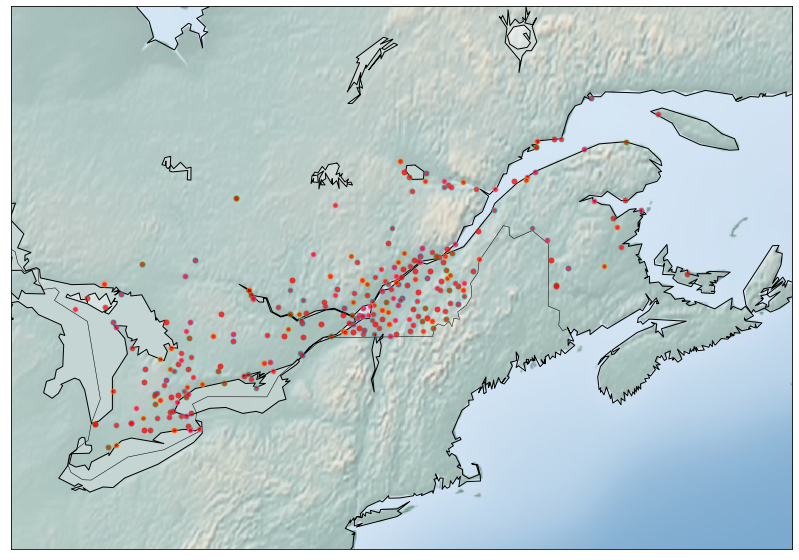

In [17]:
#Visualizing on the map:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-85
ulon=-60
llat=40
ulat=52

pdf_east = pdf_east[(pdf_east['Long'] > llon) & (pdf_east['Long'] < ulon) & (pdf_east['Lat'] > llat) &(pdf_east['Lat'] < ulat)]

my_map_east = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map_east.drawcoastlines()
my_map_east.drawcountries()
# my_map_east.drawmapboundary()
my_map_east.fillcontinents(color = 'white', alpha = 0.3)
my_map_east.shadedrelief()

# To collect data based on stations        

xs,ys = my_map_east(np.asarray(pdf_east.Long), np.asarray(pdf_east.Lat))
pdf_east['xm']= xs.tolist()
pdf_east['ym'] =ys.tolist()

#Visualization1
for index,row in pdf_east.iterrows():
#   x,y = my_map_east(row.Long, row.Lat)
   my_map_east.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


In [18]:
pdf_east.Prov.value_counts()

QC    158
ON     95
NB     12
PE      1
Name: Prov, dtype: int64

#### Analyzing the data gives the information that we are majorly looking at two provinces:

> ***QC(Quebec)***

> ***ON(Ontario)***

Further analysis is reqd. to select between these two provinces.
Taking the publically available demographic, census data from the Canada Government website.

In [19]:
census_data=pd.read_csv(r"98-401-X2016059_English_CSV_data.csv")

In [20]:
census_data.head()

,CENSUS_YEAR,GEO_CODE (POR),GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Profile of Canada, Provinces and Territories (2247)","Member ID: Profile of Canada, Provinces and Territories (2247)","Notes: Profile of Canada, Provinces and Territories (2247)",Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,2016,1,Canada,4.0,5.1,20000,1,"Population, 2016",1,1.0,35151728,...,...
1,2016,1,Canada,4.0,5.1,20000,1,"Population, 2011",2,2.0,33476688,...,...
2,2016,1,Canada,4.0,5.1,20000,1,"Population percentage change, 2011 to 2016",3,NaN,5,...,...
3,2016,1,Canada,4.0,5.1,20000,1,Total private dwellings,4,3.0,15412443,...,...
4,2016,1,Canada,4.0,5.1,20000,1,Private dwellings occupied by usual residents,5,4.0,14072079,...,...


In [21]:
#Filtering data for Quebec and Ontario
strings=["Quebec","Ontario"]
census_data=census_data[(census_data["GEO_NAME"].isin(strings))]

In [22]:
census_data.head()

,CENSUS_YEAR,GEO_CODE (POR),GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,ALT_GEO_CODE,"DIM: Profile of Canada, Provinces and Territories (2247)","Member ID: Profile of Canada, Provinces and Territories (2247)","Notes: Profile of Canada, Provinces and Territories (2247)",Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
11235,2016,35,Ontario,3.7,4.6,20000,35,"Population, 2016",1,1.0,13448494,...,...
11236,2016,24,Quebec,3.7,4.3,20000,24,"Population, 2016",1,1.0,8164361,...,...
11237,2016,35,Ontario,3.7,4.6,20000,35,"Population, 2011",2,2.0,12851821,...,...
11238,2016,24,Quebec,3.7,4.3,20000,24,"Population, 2011",2,2.0,7903001,...,...
11239,2016,35,Ontario,3.7,4.6,20000,35,"Population percentage change, 2011 to 2016",3,NaN,4.6,...,...


In [23]:
numbers=[1,2,3,6,34,35,36,37,38,39,40,662,674,751]
census_data=census_data[(census_data["Member ID: Profile of Canada, Provinces and Territories (2247)"].isin(numbers))]


In [24]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 11235 to 12736
Data columns (total 13 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   CENSUS_YEAR                                                     28 non-null     int64  
 1   GEO_CODE (POR)                                                  28 non-null     int64  
 2   GEO_NAME                                                        28 non-null     object 
 3   GNR                                                             28 non-null     float64
 4   GNR_LF                                                          28 non-null     float64
 5   DATA_QUALITY_FLAG                                               28 non-null     int64  
 6   ALT_GEO_CODE                                                    28 non-null     int64  
 7   DIM: Profile of Canada, Provinces and Territorie

In [25]:
census_data=census_data[["GEO_NAME","DIM: Profile of Canada, Provinces and Territories (2247)","Dim: Sex (3): Member ID: [1]: Total - Sex"]]

In [26]:
census_data=census_data.rename(columns={"GEO_NAME":"Province_Name","DIM: Profile of Canada, Provinces and Territories (2247)":"Index","Dim: Sex (3): Member ID: [1]: Total - Sex":"Value"}).reset_index(drop=True)

In [27]:
census_data.head()

,Province_Name,Index,Value
0,Ontario,"Population, 2016",13448494
1,Quebec,"Population, 2016",8164361
2,Ontario,"Population, 2011",12851821
3,Quebec,"Population, 2011",7903001
4,Ontario,"Population percentage change, 2011 to 2016",4.6


In [28]:
table=pd.pivot_table(census_data, values='Value', index=['Province_Name'],columns=['Index'],aggfunc=np.sum)

In [29]:
table.head()

Index,0 to 14 years,15 to 64 years,65 years and over,85 years and over,Average age of the population,Average total income in 2015 among recipients ($),Average total income of households in 2015 ($),Median age of the population,Number of total income recipients aged 15 years and over in private households - 100% data,Population density per square kilometre,"Population percentage change, 2011 to 2016","Population, 2011","Population, 2016",Total - Distribution (%) of the population by broad age groups - 100% data
Province_Name,,,,,,,,,,,,,,
Ontario,16.4,66.8,16.7,2.2,41,47915,97856,41.3,10556935,14.8,4.6,12851821,13448494,100
Quebec,16.3,65.4,18.3,2.3,41.9,42546,77306,42.5,6417615,6,3.3,7903001,8164361,100


In [30]:
table=table.astype(str).astype(float)
table[["Population, 2016","Number of total income recipients aged 15 years and over in private households - 100% data","Average total income of households in 2015 ($)"]]=table[["Population, 2016","Number of total income recipients aged 15 years and over in private households - 100% data","Average total income of households in 2015 ($)"]].astype(int)

In [31]:
table.head()

Index,0 to 14 years,15 to 64 years,65 years and over,85 years and over,Average age of the population,Average total income in 2015 among recipients ($),Average total income of households in 2015 ($),Median age of the population,Number of total income recipients aged 15 years and over in private households - 100% data,Population density per square kilometre,"Population percentage change, 2011 to 2016","Population, 2011","Population, 2016",Total - Distribution (%) of the population by broad age groups - 100% data
Province_Name,,,,,,,,,,,,,,
Ontario,16.4,66.8,16.7,2.2,41.0,47915.0,97856,41.3,10556935,14.8,4.6,12851821.0,13448494,100.0
Quebec,16.3,65.4,18.3,2.3,41.9,42546.0,77306,42.5,6417615,6.0,3.3,7903001.0,8164361,100.0


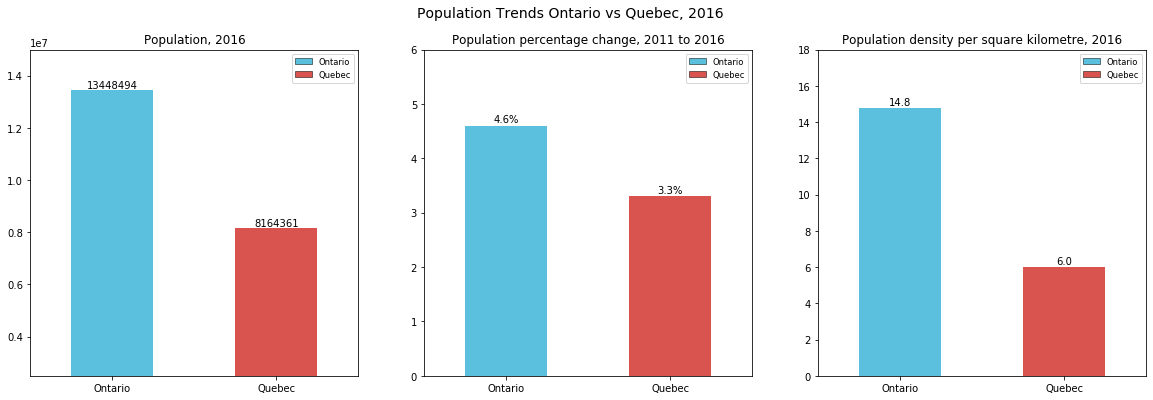

In [32]:
import matplotlib.patches as mpatches

fig = plt.figure() # create figure
fig.suptitle("Population Trends Ontario vs Quebec, 2016", fontsize=14)


labels=["Ontario","Quebec"]
x = [0,1]


one = mpatches.Patch(facecolor='#5bc0de', label='Ontario', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#d9534f', label = 'Quebec', linewidth = 0.5, edgecolor = 'black')

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 3 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 3 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 3 columns, third plot). See tip below**


# Subplot 1: Bar plot
ax0=table["Population, 2016"].plot(kind='bar', figsize=(20, 6),color=['#5bc0de','#d9534f'], ax=ax0) # add to subplot 1
ax0.set_title('Population, 2016')
ax0.set_xlabel("")
ax0.set_xticks(x)
ax0.set_xticklabels(labels,rotation=360)
ax0.set_ylim(2500000,15000000)
ax0.legend(handles=[one, two],fontsize = 'small', fancybox = True)
for p in ax0.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy() 
    ax0.annotate('{:}'.format(height), (a+0.25,b + height + 0.025),ha='center',va='bottom')


# Subplot 2: Bar plot
ax1=table["Population percentage change, 2011 to 2016"].plot(kind='bar', figsize=(20, 6), color=['#5bc0de','#d9534f'],ax=ax1) # add to subplot 2
ax1.set_title ('Population percentage change, 2011 to 2016')
ax1.set_xlabel("")
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=360)
ax1.set_ylim(0,6)
ax1.legend(handles=[one, two],fontsize = 'small', fancybox = True)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy() 
    ax1.annotate('{:}%'.format(height), (a+0.25, b + height + 0.025),ha='center',va='bottom')


# Subplot 3: Bar plot
ax2=table["Population density per square kilometre"].plot(kind='bar', figsize=(20, 6),color=['#5bc0de','#d9534f'], ax=ax2) # add to subplot 2
ax2.set_title ('Population density per square kilometre, 2016')
ax2.set_xlabel("")
ax2.set_xticks(x)
ax2.set_xticklabels(labels,rotation=360)
ax2.set_ylim(0,18)
ax2.legend(handles=[one, two],fontsize = 'small', fancybox = True)
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy() 
    ax2.annotate('{:}'.format(height), (a+0.25, b + height + 0.025),ha='center',va='bottom')


plt.show()

The Population trends show that Ontario has a higher population than Quebec. 
High percentage increase in population indicates high economic as well as social activities in Ontario.
Population density of Ontario is more than double of that of Quebec, indicating high demand generation possibilities in that region.

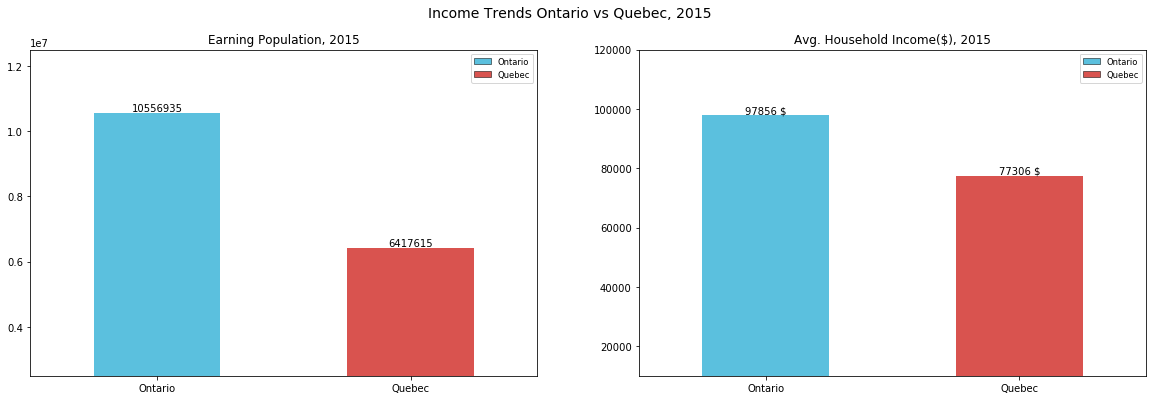

In [33]:
import matplotlib.patches as mpatches

fig = plt.figure() # create figure
fig.suptitle("Income Trends Ontario vs Quebec, 2015", fontsize=14)


labels=["Ontario","Quebec"]
x = [0,1]


one = mpatches.Patch(facecolor='#5bc0de', label='Ontario', linewidth = 0.5, edgecolor = 'black')
two = mpatches.Patch(facecolor='#d9534f', label = 'Quebec', linewidth = 0.5, edgecolor = 'black')

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


# Subplot 1: Bar plot
ax0=table["Number of total income recipients aged 15 years and over in private households - 100% data"].plot(kind='bar', figsize=(20, 6),color=['#5bc0de','#d9534f'], ax=ax0) # add to subplot 1
ax0.set_title('Earning Population, 2015')
ax0.set_xlabel("")
ax0.set_xticks(x)
ax0.set_xticklabels(labels,rotation=360)
ax0.set_ylim(2500000,12500000)
ax0.legend(handles=[one, two],fontsize = 'small', fancybox = True)
for p in ax0.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy() 
    ax0.annotate('{:}'.format(height), (a+0.25,b + height + 0.025),ha='center',va='bottom')


# Subplot 2: Bar plot
ax1=table["Average total income of households in 2015 ($)"].plot(kind='bar', figsize=(20, 6), color=['#5bc0de','#d9534f'],ax=ax1) # add to subplot 2
ax1.set_title ('Avg. Household Income($), 2015')
ax1.set_xlabel("")
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation=360)
ax1.set_ylim(10000,120000)
ax1.legend(handles=[one, two],fontsize = 'small', fancybox = True)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    a, b = p.get_xy() 
    ax1.annotate('{:} $'.format(height), (a+0.25, b + height + 0.025),ha='center',va='bottom')



plt.show()

Income trends show high earning potential of Ontario with high number of earning individuals along with high average household income, indication high consumer spending.

#### Analyzing the demographic data, we have observed the following  trends:
1. Ontario has higher population, higher population density hence more coverage for our brand
2. Ontario has had a higher percentage increase in population over the years indicating a stable and rising economy 
3. Ontario has higher number of earning individuals, indicating more consumers 
4. Ontario has higher average household income than Quebec, indicating better spending potential
5. Both the regions have 66% of population in the age group of 15-64 years and average age of the population is 41 years.

> ***Ontario*** 
#### We can safely assume that Ontario will give us better demand generation possibilities along with consumer spending. 

#### Due to paucity of quality district level demographic and economic data, we will evaluate locations in Toronto City.

In [37]:
# Importing libraries for scraping Wikipedia pages and visualizing on map

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [38]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [39]:
#Postal Code data within the city of Toronto in the province of Ontario

import requests

website_url = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text

from bs4 import BeautifulSoup
#pip install lxml

soup = BeautifulSoup(website_url,"html")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"652df336-7a6c-4f10-8854-52123f8436fb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [40]:
# Scraping the table from the page and forming a table

My_table = soup.find("table",{"class":"wikitable sortable"})

links= My_table.find_all('th') #headers
links_entries= My_table.find_all('td') #Entries

A=[]
B=[]
C=[]

for row in My_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [41]:
#Importing data from the table into a data frame

import pandas as pd
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough']=B
df['Neighborhood']=C
df.head()

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"


In [42]:
#Removing the "\n" character from every cell

cols_to_check=["Postal Code","Borough","Neighborhood"]
df[cols_to_check] = df[cols_to_check].replace({'\n':''}, regex=True)

In [43]:
# Removing the "Not assigned" Borough cells

df[df["Borough"]=="Not assigned"].Borough.value_counts()

Not assigned    77
Name: Borough, dtype: int64

In [44]:
Final_df=df[df["Borough"]!="Not assigned"].reset_index()
Final_df=Final_df.drop("index", axis=1)
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Postal Code   103 non-null    object
 1   Borough       103 non-null    object
 2   Neighborhood  103 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [45]:
#Checking if any Neighborhood is "Not assigned"
Final_df[Final_df["Neighborhood"]=="Not assigned"].Neighborhood.value_counts()

Series([], Name: Neighborhood, dtype: int64)

In [46]:
Final_df.sort_values("Postal Code").head(10)

,Postal Code,Borough,Neighborhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae
32,M1J,Scarborough,Scarborough Village
38,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
44,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
51,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
58,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [47]:
#Importing Location data

Coor_df=pd.read_csv("Geospatial_Coordinates.csv")
Coor_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [48]:
#Merging the data with the Final dataframe

df_merged = Final_df.join(Coor_df.set_index('Postal Code'), on='Postal Code')
df_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [49]:
df_merged.describe(include="all")

,Postal Code,Borough,Neighborhood,Latitude,Longitude
count,103,103,103,103.000000,103.000000
unique,103,10,99,NaN,NaN
top,M4G,North York,Downsview,NaN,NaN
freq,1,24,4,NaN,NaN
mean,NaN,NaN,NaN,43.704608,-79.397153
std,NaN,NaN,NaN,0.052463,0.097146
min,NaN,NaN,NaN,43.602414,-79.615819
25%,NaN,NaN,NaN,43.660567,-79.464763
50%,NaN,NaN,NaN,43.696948,-79.388790
75%,NaN,NaN,NaN,43.745320,-79.340923


In [50]:
# Using geopy library to get the latitude and longitude values of Toronto,CN.

address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [51]:
# create map of Toronto,CN using latitude and longitude values

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, postel_code in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Postal Code']):
    label = '{}, {}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [108]:
#Since this covers a wide area, we will perform DBSCAN clustering based on location to form clusters and find out the outliers

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_merged[['Latitude','Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN

db = DBSCAN(eps=0.4, min_samples=5,).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_merged["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_merged.Clus_Db.value_counts()

 0    50
-1    47
 1     6
Name: Clus_Db, dtype: int64

In [109]:
#Removing the 47 outliers and shortlisting the remainig 56 areas

Toronto_data=df_merged[(df_merged["Clus_Db"]== 0) | (df_merged["Clus_Db"]== 1)].reset_index(drop=True)

In [110]:
Toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Clus_Db
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0
1,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1
2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0
3,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0
4,M6B,North York,Glencairn,43.709577,-79.445073,0


In [111]:
Toronto_data.describe(include="all")

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Clus_Db
count,56,56,56,56.000000,56.000000,56.000000
unique,56,8,54,NaN,NaN,NaN
top,M4G,Downtown Toronto,Downsview,NaN,NaN,NaN
freq,1,19,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.678477,-79.406976,0.107143
std,NaN,NaN,NaN,0.030540,0.053123,0.312094
min,NaN,NaN,NaN,43.628947,-79.532242,0.000000
25%,NaN,NaN,NaN,43.652797,-79.442963,0.000000
50%,NaN,NaN,NaN,43.669274,-79.392309,0.000000
75%,NaN,NaN,NaN,43.706292,-79.377002,0.000000


In [112]:
# Creating map of Toronto with neighborhoods superimposed on the top. 

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, postel_code in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Postal Code']):
    label = '{}, {}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [113]:
#Defining Foursquare Credentials

CLIENT_ID = 'LF0AQT14JDWBXCZ43ILHFUGNCVGDCTOMVOHMPX2R2KQ5KAOA' # your Foursquare ID
CLIENT_SECRET = 'ZJYBB0M4AMVYHQNIF4SEZQ1GLOU5ALSOZZQXYWB13U3GVUET' # your Foursquare Secret
VERSION = '20200531'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LF0AQT14JDWBXCZ43ILHFUGNCVGDCTOMVOHMPX2R2KQ5KAOA
CLIENT_SECRET:ZJYBB0M4AMVYHQNIF4SEZQ1GLOU5ALSOZZQXYWB13U3GVUET


In [114]:
Toronto_data=Toronto_data.drop("Clus_Db", axis=1)

In [115]:
#Exploring the first Postal Code. Getting the latitude and Longitude of the postal code:

PC_latitude = Toronto_data.loc[0, 'Latitude'] # Postal code latitude value
PC_longitude = Toronto_data.loc[0, 'Longitude'] # Postal code longitude value

PC_name = Toronto_data.loc[0, 'Postal Code'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(PC_name, 
                                                               PC_latitude, 
                                                               PC_longitude))

Latitude and longitude values of M5A are 43.6542599, -79.3606359.


### Exploring the neighborhood of each Postal code to understand the area. Basis this analysis, location for the store will be shortlisted

In [116]:
#Exploring the neighborhood Venues:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [117]:
Toronto_venues = getNearbyVenues(names=Toronto_data['Postal Code'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )


M5A
M6A
M7A
M5B
M6B
M3C
M5C
M6C
M4E
M5E
M6E
M4G
M5G
M6G
M4H
M5H
M6H
M4J
M5J
M6J
M3K
M4K
M5K
M6K
M3L
M4L
M5L
M6L
M3M
M4M
M5M
M9M
M4N
M5N
M6N
M4P
M5P
M6P
M4R
M5R
M6R
M4S
M5S
M6S
M4T
M5T
M4V
M5V
M4W
M5W
M4X
M5X
M8X
M4Y
M7Y
M8Y


In [118]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1025, 7)


,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [119]:
# Check for null values
Toronto_venues['Venue Longitude'].isnull().values.any()

False

In [120]:
Toronto_venues.describe(include="all")

,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,1025,1025.000000,1025.000000,1025,1025.000000,1025.000000,1025
unique,56,NaN,NaN,806,NaN,NaN,213
top,M4G,NaN,NaN,Starbucks,NaN,NaN,Coffee Shop
freq,30,NaN,NaN,15,NaN,NaN,72
mean,NaN,43.668771,-79.391975,NaN,43.668892,-79.391640,NaN
std,NaN,0.026389,0.039648,NaN,0.026297,0.039517,NaN
min,NaN,43.628947,-79.532242,NaN,43.627721,-79.532854,NaN
25%,NaN,43.648960,-79.405678,NaN,43.649279,-79.405327,NaN
50%,NaN,43.661608,-79.383160,NaN,43.660887,-79.383761,NaN
75%,NaN,43.679557,-79.373306,NaN,43.677704,-79.371645,NaN


In [121]:
Toronto_venues['Venue Category'].value_counts().head(10)

Coffee Shop           72
Café                  63
Park                  37
Restaurant            35
Italian Restaurant    25
Sandwich Place        22
Bakery                22
Pizza Place           19
Bar                   16
Pub                   16
Name: Venue Category, dtype: int64

In [122]:
#Venues returned by each Postal Code:

Toronto_venues.groupby('Postal Code').count().sort_values("Venue", ascending=False).head(30)

,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal Code,,,,,,
M5L,30,30,30,30,30,30
M5W,30,30,30,30,30,30
M5K,30,30,30,30,30,30
M5J,30,30,30,30,30,30
M5H,30,30,30,30,30,30
M5G,30,30,30,30,30,30
M5E,30,30,30,30,30,30
M5C,30,30,30,30,30,30
M5B,30,30,30,30,30,30


In [123]:
#Unique Categories:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 213 uniques categories.


#### Initial Analysis:
1. There are total of 1025 venues in these neighborhoods in 213 unique categories 
2. Highest number of venues belong to eateries like Coffee shop, café, restaurants etc and then parks.
3. Boroughs with highest no. of venues belong to mostly M4 and M5 postal codes which belong to Downtown and Central Toronto boroughs

### Analyzing each Neighborhood:

In [124]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postal code column back to dataframe
Toronto_onehot['Postal Code'] = Toronto_venues['Postal Code'] 

# move postal column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Postal Code,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [125]:
Toronto_onehot[Toronto_onehot['Shopping Mall'] == 1]

,Postal Code,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
89,M5B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,M4G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
501,M3L,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [126]:
Toronto_onehot.shape

(1025, 214)

In [127]:
#Grouping each row by postal code by taking the mean of the frequency of occurrence of each category
Toronto_grouped = Toronto_onehot.groupby('Postal Code').mean().reset_index()
Toronto_grouped.head()

,Postal Code,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M3C,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.095238,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M

In [128]:
Toronto_grouped.shape

(56, 214)

In [129]:
#Printig each POstal code with 5 most common venues:

num_top_venues = 5

for hood in Toronto_grouped['Postal Code']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Postal Code'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M3C----
              venue  freq
0               Gym   0.1
1        Beer Store   0.1
2       Coffee Shop   0.1
3        Restaurant   0.1
4  Asian Restaurant   0.1


----M3K----
              venue  freq
0           Airport  0.25
1       Snack Place  0.25
2              Park  0.25
3  Business Service  0.25
4       Music Venue  0.00


----M3L----
           venue  freq
0  Grocery Store  0.33
1           Park  0.17
2          Hotel  0.17
3           Bank  0.17
4  Shopping Mall  0.17


----M3M----
                venue  freq
0      Baseball Field   0.5
1          Food Truck   0.5
2   Accessories Store   0.0
3  Mac & Cheese Joint   0.0
4              Market   0.0


----M4E----
               venue  freq
0       Neighborhood  0.25
1                Pub  0.25
2  Health Food Store  0.25
3              Trail  0.25
4  Accessories Store  0.00


----M4G----
                    venue  freq
0             Coffee Shop  0.10
1                    Bank  0.07
2            Burger Joint  0.07
3     Spor

In [130]:
#Putting values in a df

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [131]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
PC_venues_sorted = pd.DataFrame(columns=columns)
PC_venues_sorted['Postal Code'] = Toronto_grouped['Postal Code']

for ind in np.arange(Toronto_grouped.shape[0]):
    PC_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

PC_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3C,Coffee Shop,Restaurant,Gym,Beer Store,Asian Restaurant,Supermarket,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Discount Store
1,M3K,Airport,Snack Place,Park,Business Service,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center
2,M3L,Grocery Store,Park,Shopping Mall,Bank,Hotel,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run
3,M3M,Baseball Field,Food Truck,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
4,M4E,Neighborhood,Pub,Health Food Store,Trail,Cuban Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner


In [132]:
Toronto_grouped_clustering = Toronto_grouped.drop('Postal Code', 1)
Toronto_grouped_clustering.head()

,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Opera House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.047619,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.095238,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.047619,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.25,0.0,0.0,

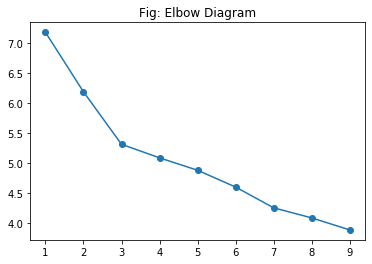

In [133]:
#Checking the most efficient value of K:
#Elbow Method
import matplotlib.pyplot as plt
%matplotlib inline

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( Toronto_grouped_clustering )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig: Elbow Diagram");

#### Best value of K="4"

In [134]:
# run k-means clustering
# set number of clusters
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, n_jobs = -1, init='k-means++',n_init = 12).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 1, 0, 0, 0, 2, 0, 0], dtype=int32)

In [135]:
PC_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3C,Coffee Shop,Restaurant,Gym,Beer Store,Asian Restaurant,Supermarket,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Discount Store
1,M3K,Airport,Snack Place,Park,Business Service,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center
2,M3L,Grocery Store,Park,Shopping Mall,Bank,Hotel,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run
3,M3M,Baseball Field,Food Truck,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
4,M4E,Neighborhood,Pub,Health Food Store,Trail,Cuban Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner


In [136]:
# add clustering labels
PC_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(PC_venues_sorted.set_index('Postal Code'), on='Postal Code')

Toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Breakfast Spot,Theater,Bakery,Café,Restaurant,Pub,Chocolate Shop,Performing Arts Venue
1,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Accessories Store,Furniture / Home Store,Coffee Shop,Miscellaneous Shop,Boutique,Event Space,Sporting Goods Shop,Vietnamese Restaurant,Garden Center
2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Sandwich Place,Bar,Beer Bar,Italian Restaurant,Smoothie Shop,Distribution Center,Burrito Place
3,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Café,Coffee Shop,Theater,Diner,Tea Room,Electronics Store,Bar,College Rec Center,Steakhouse,Hotel
4,M6B,North York,Glencairn,43.709577,-79.445073,0,Pizza Place,Pub,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center


In [137]:
#Visualizing the clusters:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Postal Code'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [138]:
Toronto_merged['Cluster Labels'].value_counts()

0    45
2     6
1     3
3     2
Name: Cluster Labels, dtype: int64

## Examining the clusters:

In [139]:
Toronto_merged[(Toronto_merged['Cluster Labels'] == 3) | (Toronto_merged['Cluster Labels'] == 1) | (Toronto_merged['Cluster Labels'] == 2)]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,2,Park,Women's Store,Pool,Yoga Studio,Dance Studio,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
17,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,2,Coffee Shop,Park,Convenience Store,Yoga Studio,Deli / Bodega,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center
24,M3L,North York,Downsview,43.739015,-79.506944,3,Grocery Store,Park,Shopping Mall,Bank,Hotel,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run
28,M3M,North York,Downsview,43.728496,-79.495697,1,Baseball Field,Food Truck,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
31,M9M,North York,"Humberlea, Emery",43.724766,-79.532242,1,Baseball Field,Food Service,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
32,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,2,Park,Swim School,Bus Line,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
34,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262,3,Grocery Store,Breakfast Spot,Brewery,Bus Line,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run
36,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,2,Jewelry Store,Park,Sushi Restaurant,Trail,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center
48,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,2,Park,Playground,Trail,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store
52,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,2,Pool,Park,River,Yoga Studio,Cuban Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner


### These 11 areas are mostly outliers with open areas like playground, parks, baseball fields, swim schools, yoga studios etc. and other one off stores. Hence we can filter these out

In [140]:
Toronto_merged=Toronto_merged[(Toronto_merged['Cluster Labels'] == 0)].drop("Cluster Labels", axis=1).reset_index(drop=True)

### Since most of the Bouroughs here belong to Toronto, filtering out the outliers

In [141]:
Toronto_data=Toronto_merged.query('Borough.str.contains("Toronto")', engine='python').reset_index(drop=True)

In [142]:
locations=["Central Toronto", "Downtown Toronto"]
Toronto_data=Toronto_data[Toronto_data["Borough"].isin(locations)].reset_index(drop=True)
Toronto_data=Toronto_data.rename(columns={"Postal Code":"Postal_Code"})
Toronto_data

,Postal_Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Breakfast Spot,Theater,Bakery,Café,Restaurant,Pub,Chocolate Shop,Performing Arts Venue
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Sandwich Place,Bar,Beer Bar,Italian Restaurant,Smoothie Shop,Distribution Center,Burrito Place
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Café,Coffee Shop,Theater,Diner,Tea Room,Electronics Store,Bar,College Rec Center,Steakhouse,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Gastropub,Café,Coffee Shop,Restaurant,BBQ Joint,New American Restaurant,Cocktail Bar,Poke Place,Cosmetics Shop,Creperie
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Cocktail Bar,Beer Bar,Coffee Shop,Seafood Restaurant,Liquor Store,Farmers Market,Basketball Stadium,Comfort Food Restaurant,Bistro,Breakfast Spot
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Coffee Shop,Café,Yoga Studio,Poke Place,Bar,Sushi Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Ramen Restaurant
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,Grocery Store,Café,Park,Restaurant,Baby Store,Candy Store,Coffee Shop,Nightclub,Diner,Athletics & Sports
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,Coffee Shop,Café,Pizza Place,Seafood Restaurant,Steakhouse,Fast Food Restaurant,Hotel,Speakeasy,Smoke Shop,Japanese Restaurant
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,Park,Plaza,Hotel,Japanese Restaurant,Bubble Tea Shop,Ice Cream Shop,Basketball Stadium,Sporting Goods Shop,Italian Restaurant,New American Restaurant
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,Coffee Shop,Café,Japanese Restaurant,Deli / Bodega,Gym / Fitness Center,Steakhouse,Hotel,Bakery,Beer Bar,Pub


In [155]:
#Visualising the shortlisted areas:

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, postel_code in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Borough'], Toronto_data['Postal_Code']):
    label = '{}, {}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  

# add pop-up text to each marker on the map
latitudes = list(Toronto_data.Latitude)
longitudes = list(Toronto_data.Longitude)
labels = list(Toronto_data.Postal_Code)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_Toronto)    
    
map_Toronto

#### These areas are within a radius of 5 km from the central point and some seem to one off locations. To further reduce the area and make it more specific, we will do DBSCAN clustering based on location data.

In [150]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = Toronto_data[['Latitude','Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.7, min_samples=5, algorithm='ball_tree', metric='haversine').fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
Toronto_data["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
Toronto_data[["Postal_Code","Clus_Db"]].head(5)
Toronto_data.Clus_Db.value_counts()

 0    13
-1     7
 1     5
Name: Clus_Db, dtype: int64

In [151]:
# Selecting cluster 0 & 1, discarding the outliers

Toronto_data_db=Toronto_data[(Toronto_data["Clus_Db"]== 0) | (Toronto_data["Clus_Db"]== 1)]
Toronto_data_db

,Postal_Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Clus_Db
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Coffee Shop,Sushi Restaurant,Yoga Studio,Sandwich Place,Bar,Beer Bar,Italian Restaurant,Smoothie Shop,Distribution Center,Burrito Place,0
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Café,Coffee Shop,Theater,Diner,Tea Room,Electronics Store,Bar,College Rec Center,Steakhouse,Hotel,0
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Gastropub,Café,Coffee Shop,Restaurant,BBQ Joint,New American Restaurant,Cocktail Bar,Poke Place,Cosmetics Shop,Creperie,0
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Cocktail Bar,Beer Bar,Coffee Shop,Seafood Restaurant,Liquor Store,Farmers Market,Basketball Stadium,Comfort Food Restaurant,Bistro,Breakfast Spot,0
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,Coffee Shop,Café,Yoga Studio,Poke Place,Bar,Sushi Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Ramen Restaurant,0
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,Coffee Shop,Café,Pizza Place,Seafood Restaurant,Steakhouse,Fast Food Restaurant,Hotel,Speakeasy,Smoke Shop,Japanese Restaurant,0
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,Park,Plaza,Hotel,Japanese Restaurant,Bubble Tea Shop,Ice Cream Shop,Basketball Stadium,Sporting Goods Shop,Italian Restaurant,New American Restaurant,0
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,Coffee Shop,Café,Japanese Restaurant,Deli / Bodega,Gym / Fitness Center,Steakhouse,Hotel,Bakery,Beer Bar,Pub,0
10,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,Café,Japanese Restaurant,Restaurant,Coffee Shop,Gastropub,Deli / Bodega,Ice Cream Shop,Gym / Fitness Center,Pub,Seafood Restaurant,0
11,M5N,Central Toronto,Roselawn,43.711695,-79.416936,Ice Cream Shop,Garden,Home Service,Music Venue,Yoga Studio,Eastern European Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,1


In [154]:
# Creating map of Toronto with neighborhoods superimposed on the top. 
from folium.plugins import MarkerCluster
from folium import plugins

map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

marker_cluster = MarkerCluster().add_to(map_Toronto)


folium.Marker(
    location=[43.7, -79.39],
    popup='Central Toronto.',
    icon=folium.Icon(color='red', icon='ok-sign')
).add_to(marker_cluster)

folium.Marker(
    location=[43.65, -79.38],
    popup='Downtown Toronto',
    icon=folium.Icon(color='red', icon='ok-sign'),
).add_to(marker_cluster)


# add markers to map
for lat, lng, borough, postel_code in zip(Toronto_data_db['Latitude'], Toronto_data_db['Longitude'], Toronto_data_db['Borough'], Toronto_data_db['Postal_Code']):
    label = '{},{}'.format(postel_code, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    


# add pop-up text to each marker on the map
latitudes = list(Toronto_data_db.Latitude)
longitudes = list(Toronto_data_db.Longitude)
labels = list(Toronto_data_db.Postal_Code)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_Toronto)  
    
map_Toronto

#### So the short listed areas are: 

> ***Central Toronto*** 
1. Whole area, consisting of 5 postal codes is within a radius of 2 km
2. There are 2 clothing stores and 1 shopping mall in this area as per the given dataset
3. Overall no. of eateries, departmental stores, recreational centres are far lesser than Downtown Toronto

> ***Downtown Toronto*** 
1. Whole area, consisting of 13 postal codes is within a radius of 1.5 km
2. There are 2 clothing stores and 1 shopping mall in this area as per the given dataset
3. Overall no. of eateries, departmental stores, recreational centres are far more than Central Toronto
4. The area has Union train station which is the central station and one of the busiest train stations in Ontario, hence more footfalls, easy accessibility.

#### Basis the above analysis, "Downtown Toronto" is the best choice considering the below factors:
1. It being the centre of economic activity(High Spending potential individuals, High market potential)
2. Presence of upteen no. of eating outlets, recreational centres, centre of all activities(attracting more crowds, High brand visibility, high pedestrain traffic, High customer pull)
3. Presence of a central train station (easy accessibility, hence larger footfalls)
4. As per the economic survey, Downtown is the main business district of Toronto and it has the retail core presence with over 600 retail stores within 1.5 km radius area

Within Downtown, other factors like availability of a good  location, financial matters, competition presence etc. will determine the best place to open the store in.

#### Due to scarcity of district level data, other factors such as Psychographics, Financial and Trade parameters couldnt be analysed at this point of time. 